In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd

In [53]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 

In [54]:
df = pd.read_csv('twitter_sentiment.csv',header=None, index_col=0)

In [55]:
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [56]:
df = df[[2,3]].reset_index(drop=True)

In [57]:
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [59]:
df.isnull().sum()
df.dropna(inplace=True)
#df = df[df['text']]

In [60]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len)<=5)

(72883, 2113)

In [61]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [62]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [76]:
df['text']

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
75677    ⭐️ Toronto is the arts and culture capital of ...
75678    tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679    Today sucked so it’s time to drink wine n play...
75680    Bought a fraction of Microsoft today. Small wins.
75681    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 72883, dtype: object

In [83]:
# basic feature extraction | 
import preprocess_kgptalkie as ps

df = ps.get_basic_features(df)

In [84]:
df.columns  

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [85]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


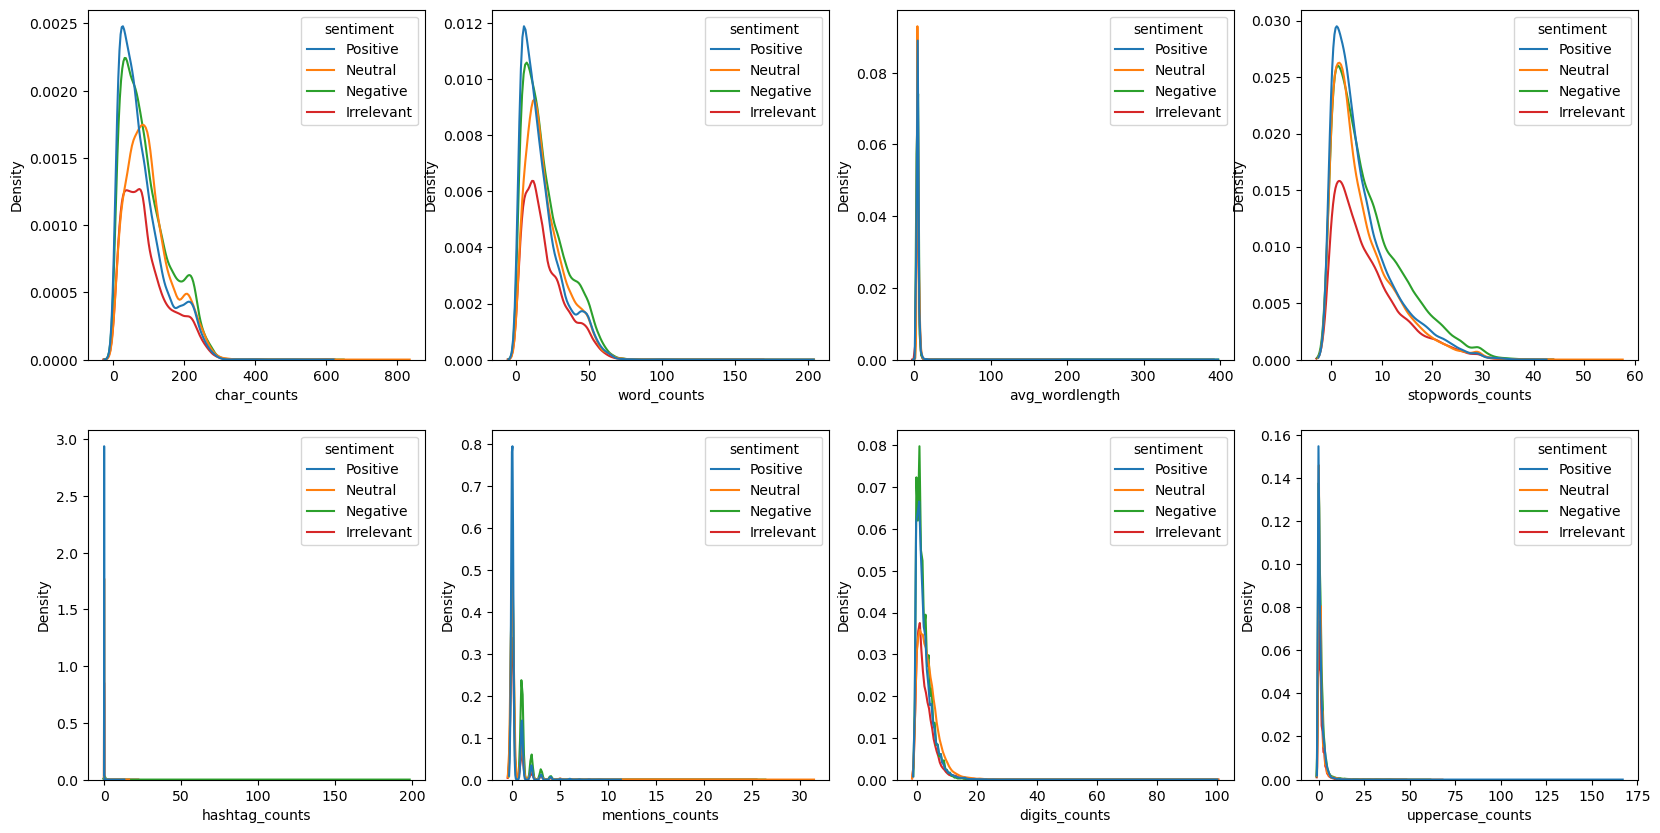

In [90]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=False)

<Axes: ylabel='count'>

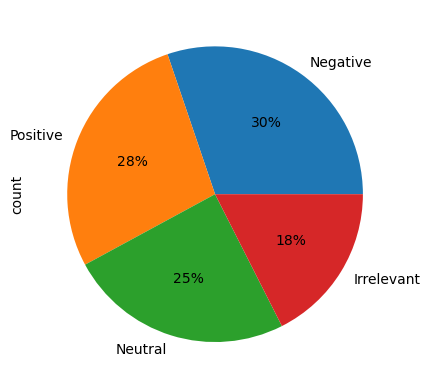

In [91]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [92]:
## Wordcloud visualization
!pip install wordcloud

In [93]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

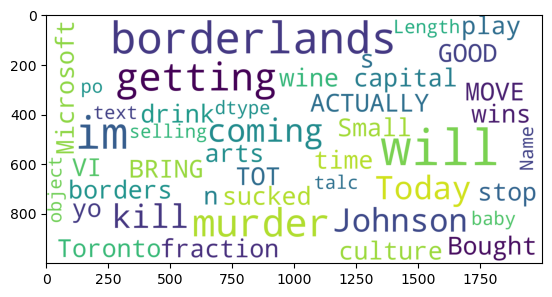

In [97]:
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords,
                     max_words=300, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

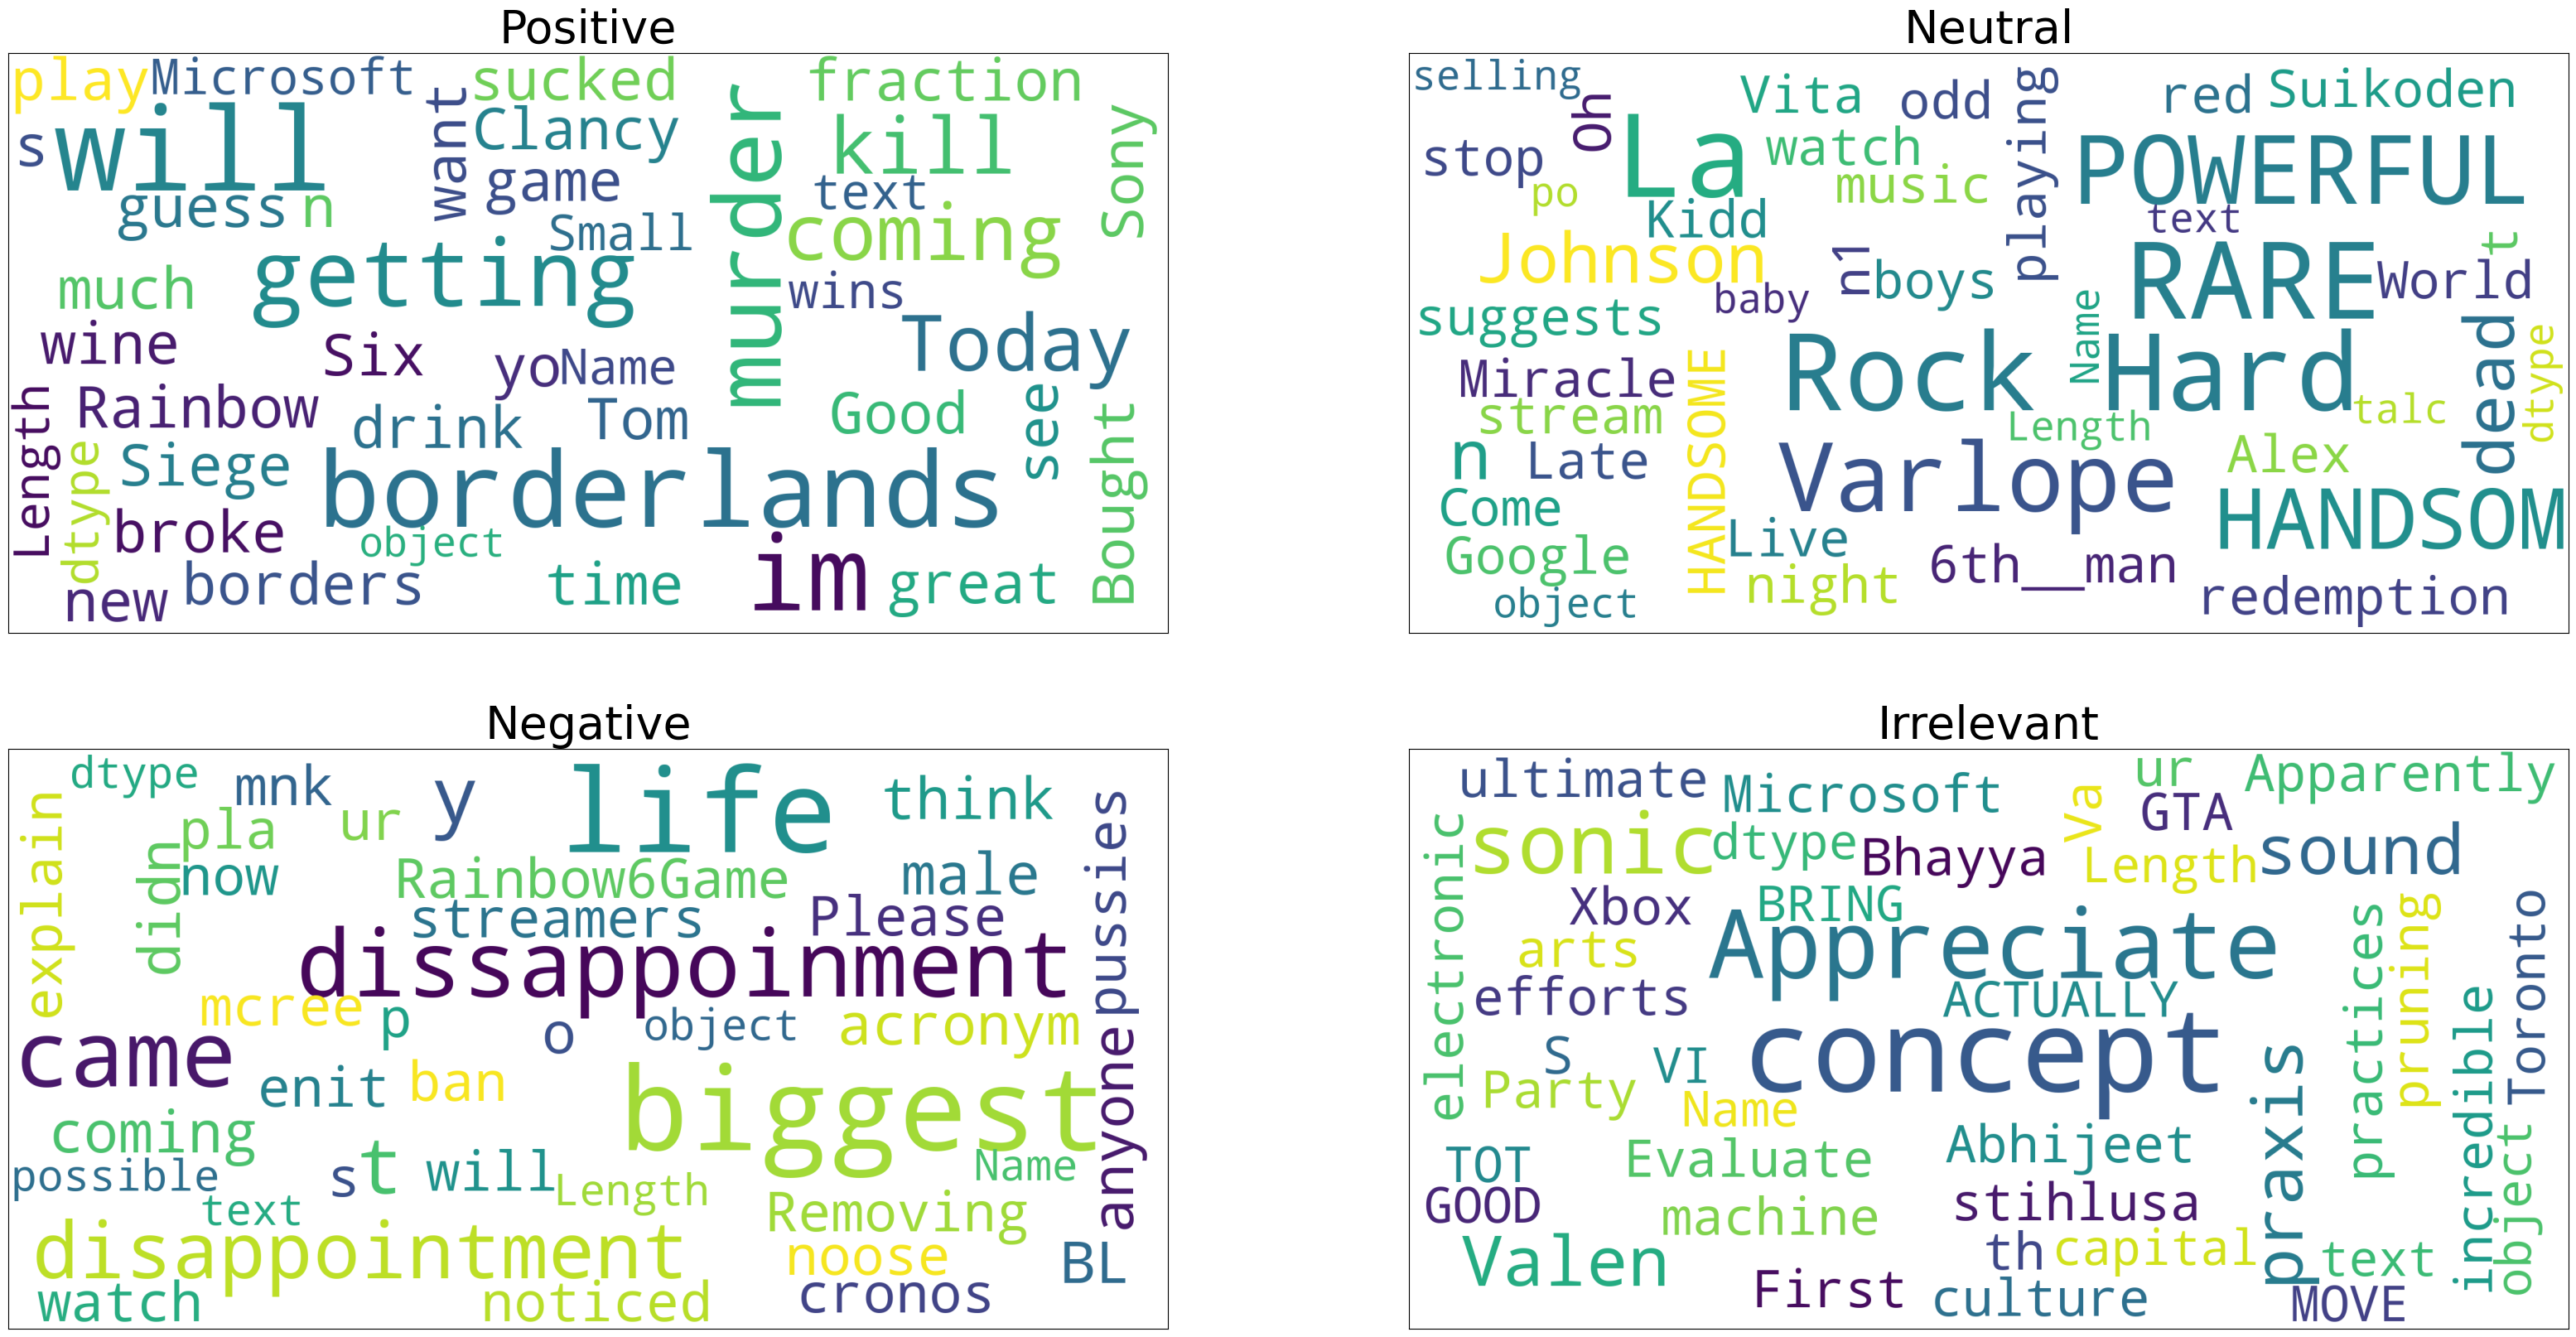

In [100]:
plt.figure(figsize=(40,20))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    
    data = df[df['sentiment']==sent]['text']
    wordcloud = WordCloud(background_color = 'white',stopwords=stopwords,
                     max_words=300, max_font_size=40, scale=5).generate(str(data))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize=40)

### Data Cleaning 

In [101]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))

In [104]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [105]:
X_train.shape, X_test.shape

((58306,), (14577,))

### Model Building and Testing

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [116]:
clf = Pipeline([('tfid', TfidfVectorizer()), 
                ('rfc', RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [121]:
# evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.86      0.91      2502
    Negative       0.92      0.96      0.94      4436
     Neutral       0.92      0.92      0.92      3619
    Positive       0.92      0.94      0.93      4020

    accuracy                           0.93     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.93      0.93     14577



In [122]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.925773478767922


In [125]:
import pickle
pickle.dump(clf, open("Social_media_sentiment.pkl", 'wb'))

In [134]:
clf.predict(['i have done but play borderland'])

array(['Positive'], dtype=object)